**1. 데이터 확인**

In [3]:
import pandas as pd

cp = pd.read_csv('train.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [5]:
cp.head(10)

NameError: name 'cp' is not defined

In [7]:
cp.tail(10)

NameError: name 'cp' is not defined

In [9]:
print('DataFrame 크기: ', cp.shape)
print(type(cp))

NameError: name 'cp' is not defined

**2. 결측치 확인**

In [ ]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


In [ ]:
cp.columns


Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [ ]:
cp.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [ ]:
cp.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


In [ ]:
for col in cp.columns:
    print(f"Value counts for {col}:")
    print(cp[col].value_counts(dropna=False))
    print("\n")

Value counts for id:
id
0         1
125693    1
125684    1
125685    1
125686    1
         ..
62846     1
62847     1
62848     1
62849     1
188532    1
Name: count, Length: 188533, dtype: int64


Value counts for brand:
brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo      

X변수, Y변수 설정 (변수 삭제)

In [ ]:
# 관련 없는 열 제외(model, engine 열 제외)
cp_y=cp['price']
cp_x=cp.drop(["id","model","engine",'price'], axis=1)
cp_x

,brand,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title
0,MINI,2007,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes
1,Lincoln,2002,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes
2,Chevrolet,2002,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes
3,Genesis,2017,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes
4,Mercedes-Benz,2021,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes
...,...,...,...,...,...,...,...,...,...
188528,Cadillac,2017,49000,Gasoline,Transmission w/Dual Shift Mode,White,Beige,None reported,Yes
188529,Mercedes-Benz,2018,28600,Gasoline,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes
188530,Mercedes-Benz,2021,13650,Gasoline,7-Speed A/T,White,Black,None reported,Yes
188531,Audi,2022,13895,Gasoline,1-Speed Automatic,Daytona Gray Pearl Effect,Black,None reported,NaN


**상관관계1 확인**

In [ ]:
# 중고차 가격과 다른 변수들 간의 상관관계

# 숫자형 데이터만 선택하여 상관관계 계산
cp_x_numeric = cp_x.select_dtypes(include=['float64', 'int64'])
cp_numeric = pd.concat([cp_x_numeric,cp_y], axis=1)

# 상관관계 계산
correlation_matrix = cp_numeric.corr()

# 상관관계 출력
print(correlation_matrix)

            model_year    milage     price
model_year    1.000000 -0.669936  0.231795
milage       -0.669936  1.000000 -0.283067
price         0.231795 -0.283067  1.000000


전처리 및 인코딩

In [ ]:
#컬럼이 어떤 값으로 이루어져있는지 확인
cp_x['fuel_type'].unique()

array(['Gasoline', 'E85 Flex Fuel', nan, 'Hybrid', 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

In [ ]:
import pandas as pd
import numpy as np

# 결측값(NaN)을 'Unknown'으로 채우기
cp_x['fuel_type'].fillna('Unknown', inplace=True)

# 특수 문자 및 'not supported'를 'Unknown'으로 변경
cp_x['fuel_type'].replace(['–', 'not supported'], 'Unknown', inplace=True)

cp_x['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,165940
Hybrid,6832
Unknown,5879
E85 Flex Fuel,5406
Diesel,3955
Plug-In Hybrid,521


In [1]:
# 원-핫 인코딩 적용 (pd.get_dummies 사용)
ft_encoded = pd.get_dummies(cp_x.fuel_type)

print("\n원-핫 인코딩된 데이터프레임:")
ft_encoded.head

NameError: name 'pd' is not defined

In [ ]:
ft_encoded.tail(10)

,Diesel,E85 Flex Fuel,Gasoline,Hybrid,Plug-In Hybrid,Unknown
188523,False,False,True,False,False,False
188524,False,False,True,False,False,False
188525,False,False,True,False,False,False
188526,False,False,True,False,False,False
188527,False,False,True,False,False,False
188528,False,False,True,False,False,False
188529,False,False,True,False,False,False
188530,False,False,True,False,False,False
188531,False,False,True,False,False,False
188532,False,False,True,False,False,False


**brand**

In [ ]:
b_encoded = pd.get_dummies(cp_x.brand)
print("\n원-핫 인코딩된 데이터프레임:")
b_encoded.head(10)


원-핫 인코딩된 데이터프레임:


,Acura,Alfa,Aston,Audi,BMW,Bentley,Bugatti,Buick,Cadillac,Chevrolet,...,Saab,Saturn,Scion,Subaru,Suzuki,Tesla,Toyota,Volkswagen,Volvo,smart
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**transmission**

In [ ]:
trans_encoded = pd.get_dummies(cp_x.transmission)
print("\n원-핫 인코딩된 데이터프레임:")
trans_encoded.head(10)


원-핫 인코딩된 데이터프레임:


,1-Speed A/T,1-Speed Automatic,10-Speed A/T,10-Speed Automatic,10-Speed Automatic with Overdrive,2,2-Speed A/T,2-Speed Automatic,4-Speed A/T,4-Speed Automatic,...,CVT-F,F,M/T,Manual,SCHEDULED FOR OR IN PRODUCTION,Single-Speed Fixed Gear,Transmission Overdrive Switch,Transmission w/Dual Shift Mode,Variable,–
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


ext_col

In [ ]:
ec_encoded = pd.get_dummies(cp_x.ext_col)
print("\n원-핫 인코딩된 데이터프레임:")
ec_encoded.head(10)


원-핫 인코딩된 데이터프레임:


,Agate Black Metallic,Alfa White,Alpine White,Alta White,Ametrin Metallic,Anodized Blue Metallic,Anthracite Blue Metallic,Antimatter Blue Metallic,Apex Blue,Arancio Borealis,...,White Platinum Tri-Coat Metallic,Wind Chill Pearl,Wolf Gray,Yellow,Yulong,Yulong White,designo Diamond White,designo Diamond White Bright,designo Diamond White Metallic,–
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


int_col

In [ ]:
ic_encoded = pd.get_dummies(cp_x.int_col)
print("\n원-핫 인코딩된 데이터프레임:")
ic_encoded.head(10)


원-핫 인코딩된 데이터프레임:


,AMG Black,Adrenaline Red,Agave Green,Almond Beige,Amber,Anthracite,Aragon Brown,Ash,BEIGE,BLACK,...,Titan Black / Quarzit,Tupelo,Very Light Cashmere,WHITE,Walnut,Whisper Beige,White,White / Brown,Yellow,–
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print(ic_encoded.dtypes)

AMG Black         bool
Adrenaline Red    bool
Agave Green       bool
Almond Beige      bool
Amber             bool
                  ... 
Whisper Beige     bool
White             bool
White / Brown     bool
Yellow            bool
–                 bool
Length: 156, dtype: object


accident

In [ ]:
cp_x['accident'].fillna('None reported', inplace=True)
print(cp_x['accident'].value_counts())

accident
None reported                             146966
At least 1 accident or damage reported     41567
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
acc_encoded = label_encoder.fit_transform(cp_x['accident'])
acc_encoded = pd.DataFrame(acc_encoded, columns=['accident'])
print("\n레이블 인코딩된 데이터프레임:")
acc_encoded.head(10)


레이블 인코딩된 데이터프레임:


,accident
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


**clean_title**

In [ ]:
cp_x['clean_title'].fillna('Unknown', inplace=True)
print(cp_x['clean_title'].value_counts())

clean_title
Yes        167114
Unknown     21419
Name: count, dtype: int64


In [ ]:
ct_encoded = label_encoder.fit_transform(cp_x['clean_title'])
ct_encoded = pd.DataFrame(ct_encoded, columns=['clean_title'])
print("\n레이블 인코딩된 데이터프레임:")
ct_encoded.head(10)


레이블 인코딩된 데이터프레임:


,clean_title
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
object_columns = cp_x.select_dtypes(include=['object']).columns
cp_x_df=cp_x.drop(columns=object_columns)
cp_x_df.head(10)

,model_year,milage
0,2007,213000
1,2002,143250
2,2002,136731
3,2017,19500
4,2021,7388
5,2018,40950
6,2016,62200
7,2016,102604
8,2020,38352
9,2015,74850


In [ ]:
# 작업한 컬럼들을 다시 이어붙임
cp_x_df = pd.concat([cp_x_df,ft_encoded,b_encoded,acc_encoded,trans_encoded,ec_encoded,ic_encoded,ct_encoded], axis=1)
cp_x_df

,model_year,milage,Diesel,E85 Flex Fuel,Gasoline,Hybrid,Plug-In Hybrid,Unknown,Acura,Alfa,...,Tupelo,Very Light Cashmere,WHITE,Walnut,Whisper Beige,White,White / Brown,Yellow,–,clean_title
0,2007,213000,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
1,2002,143250,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,2002,136731,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,2017,19500,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
4,2021,7388,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,2017,49000,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
188529,2018,28600,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
188530,2021,13650,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
188531,2022,13895,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [ ]:
# True/False를 1/0으로 변환
for column in cp_x_df.columns:
    cp_x_df[column] = cp_x_df[column].astype(int)

cp_x_df

,model_year,milage,Diesel,E85 Flex Fuel,Gasoline,Hybrid,Plug-In Hybrid,Unknown,Acura,Alfa,...,Tupelo,Very Light Cashmere,WHITE,Walnut,Whisper Beige,White,White / Brown,Yellow,–,clean_title
0,2007,213000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2002,143250,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2002,136731,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2017,19500,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021,7388,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188528,2017,49000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
188529,2018,28600,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
188530,2021,13650,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
188531,2022,13895,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cp_y

,price
0,4200
1,4999
2,13900
3,45000
4,97500
...,...
188528,27500
188529,30000
188530,86900
188531,84900


In [ ]:
cp_x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Columns: 594 entries, model_year to clean_title
dtypes: int64(594)
memory usage: 854.4 MB


In [ ]:
cp_x_df.columns


Index(['model_year', 'milage', 'Diesel', 'E85 Flex Fuel', 'Gasoline', 'Hybrid',
       'Plug-In Hybrid', 'Unknown', 'Acura', 'Alfa',
       ...
       'Tupelo', 'Very Light Cashmere', 'WHITE', 'Walnut', 'Whisper Beige',
       'White', 'White / Brown', 'Yellow', '–', 'clean_title'],
      dtype='object', length=594)

일단 시각화

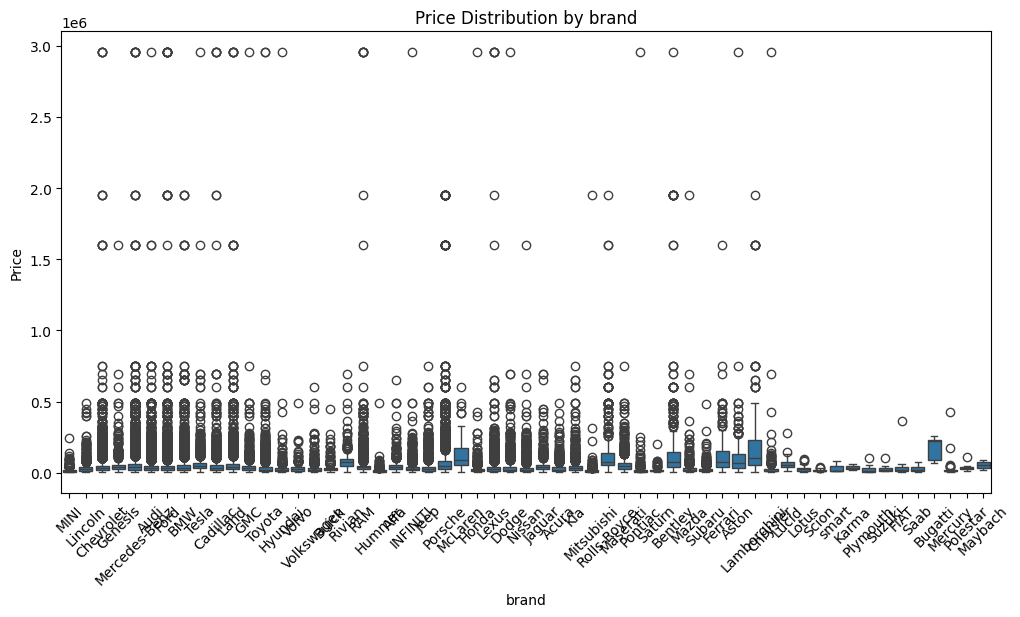

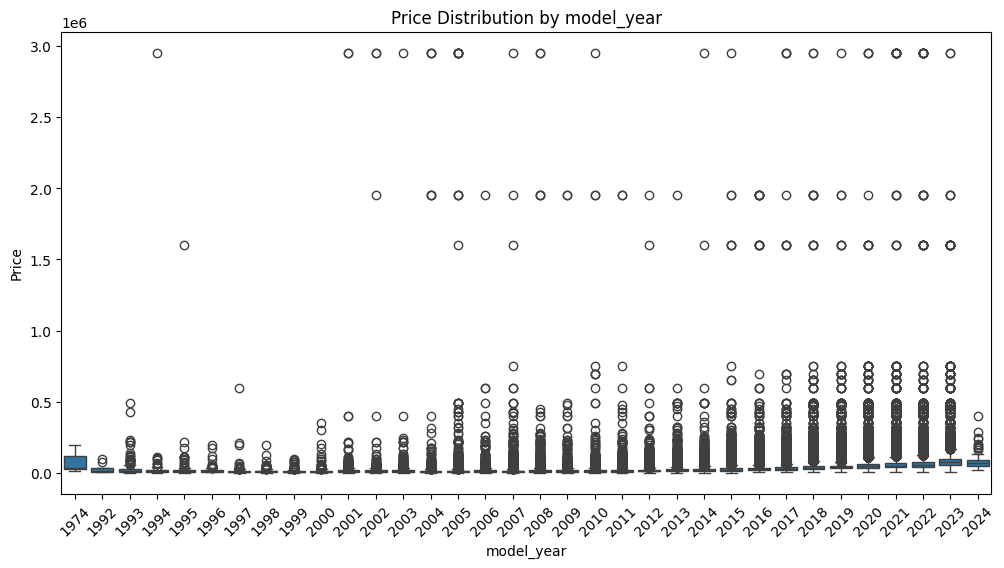

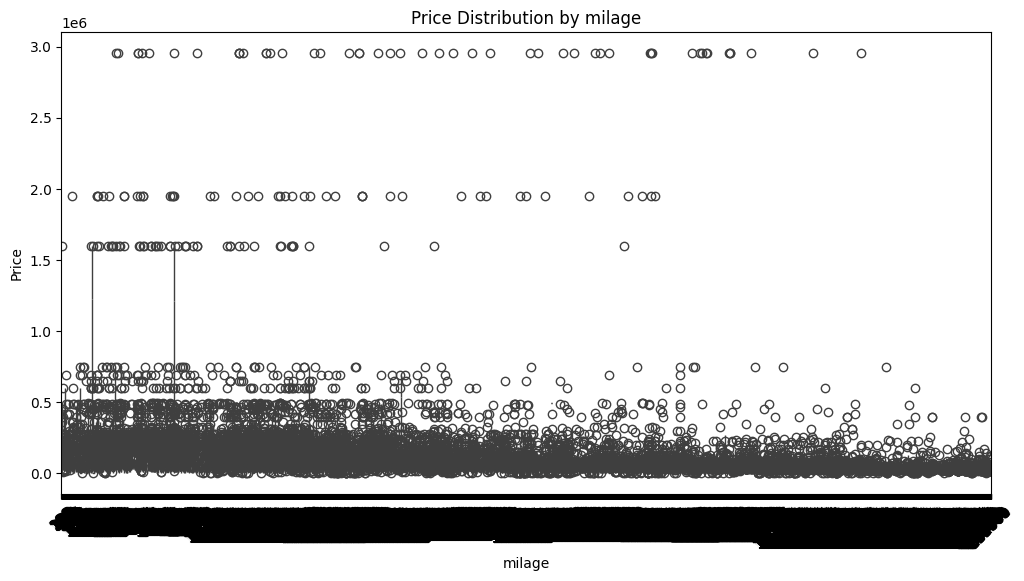

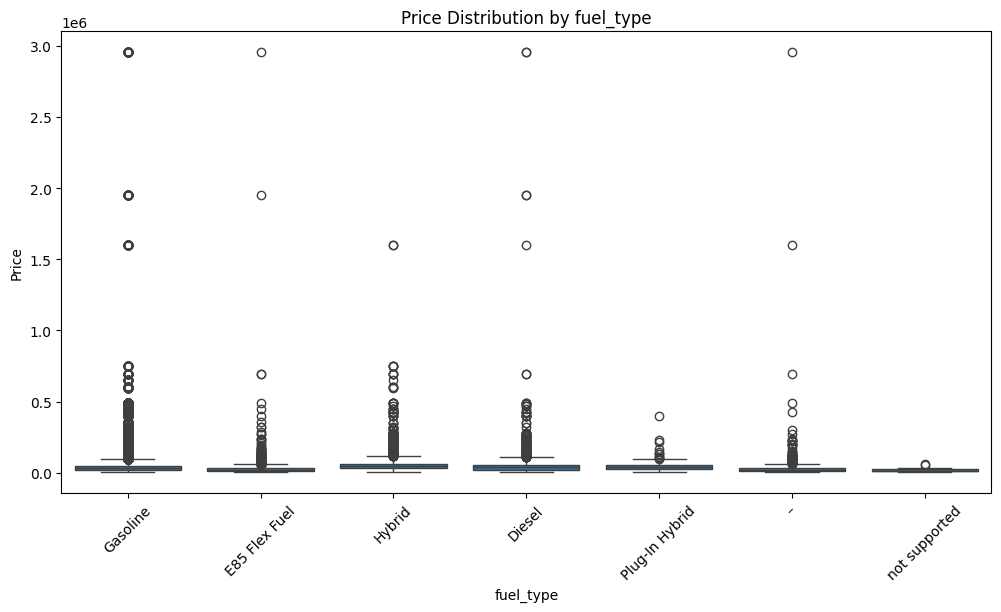

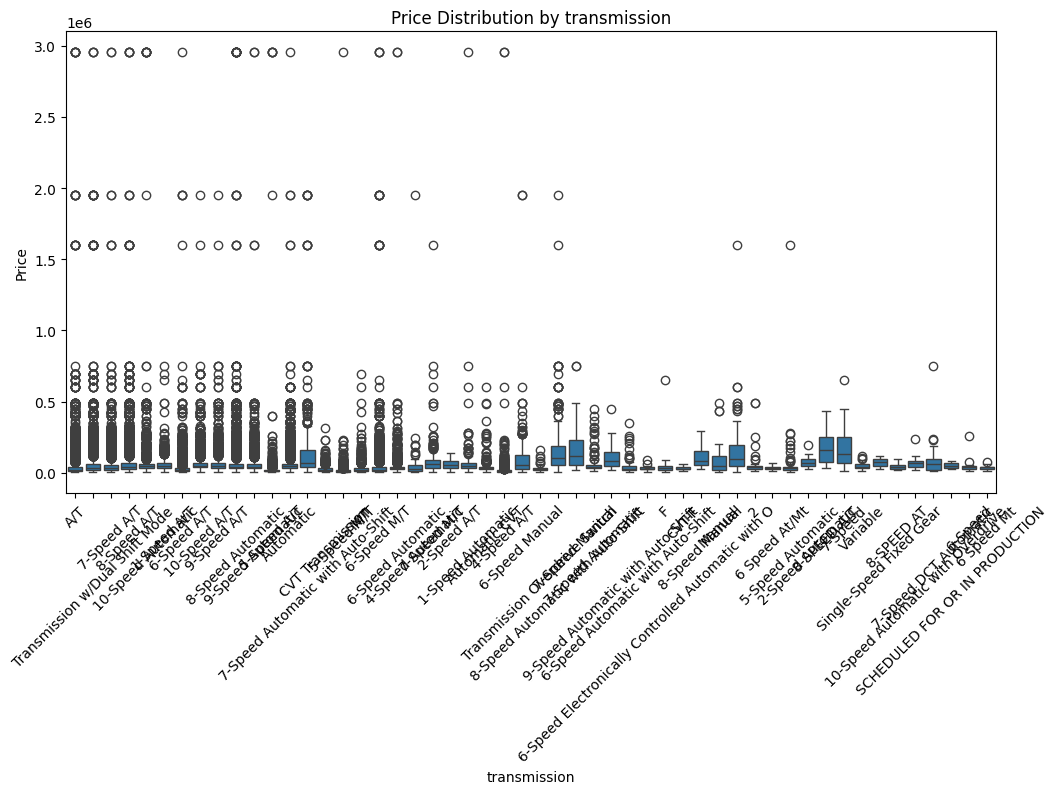

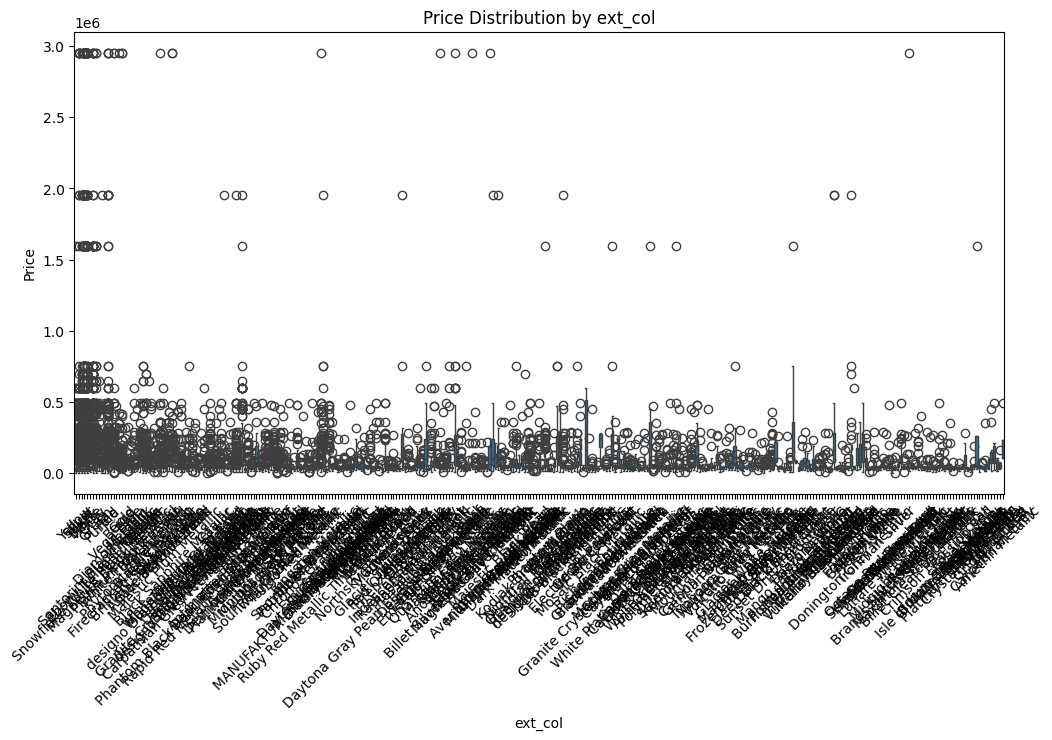

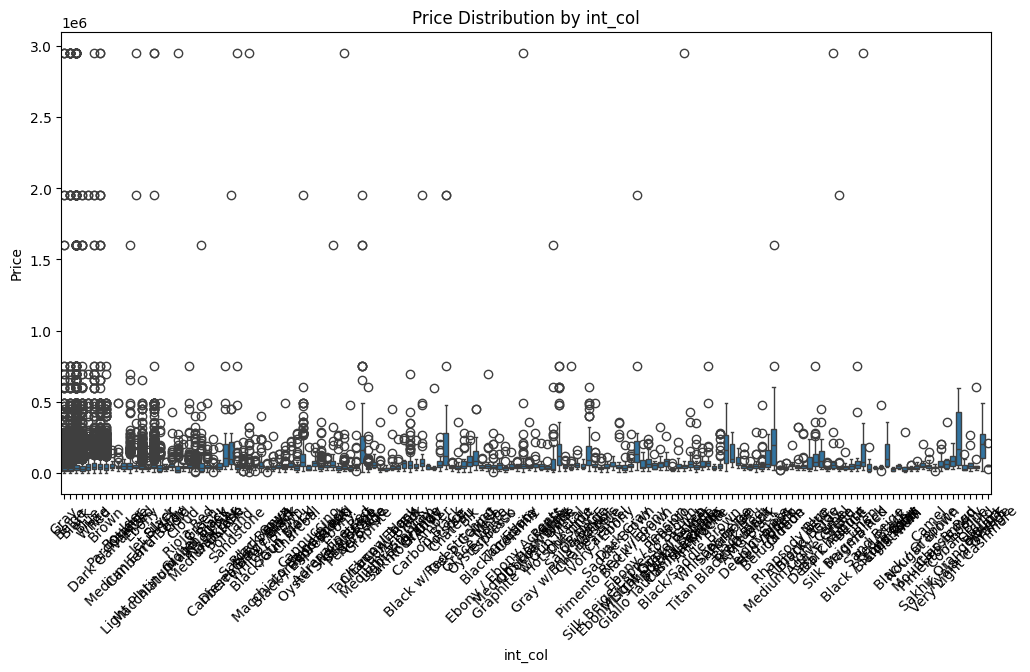

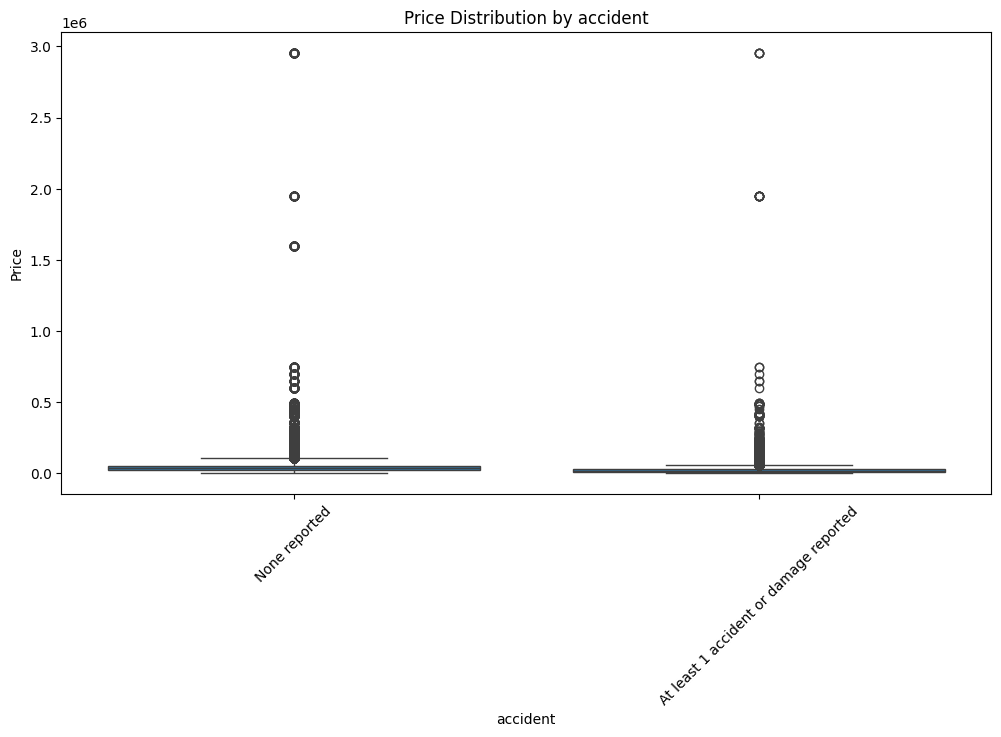

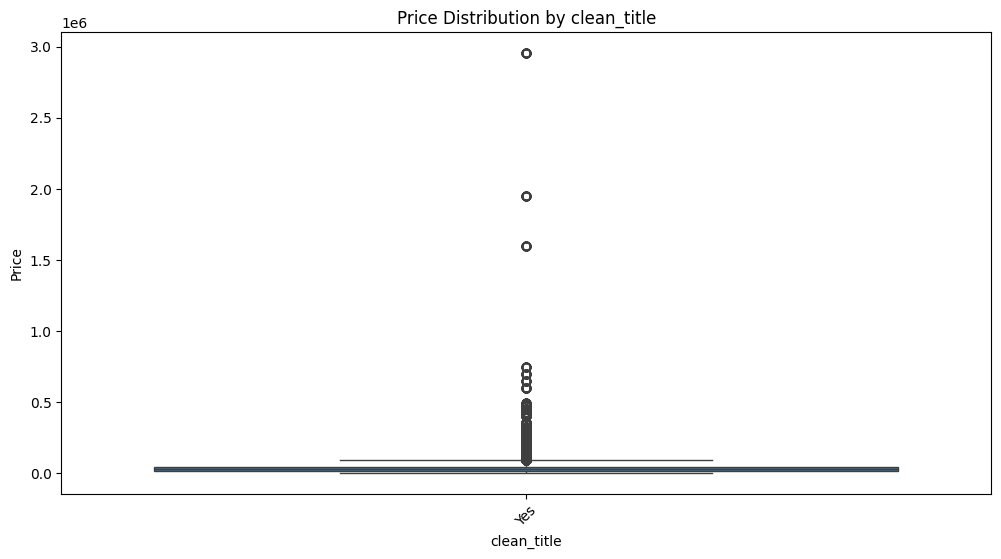

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# 시각화할 변수 리스트
variables = ['brand', 'model_year', 'milage', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# 각 변수별로 시각화
for var in variables:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=var, y='price', data=cp)
    plt.title(f'Price Distribution by {var}')
    plt.xlabel(var)
    plt.ylabel('Price')
    plt.xticks(rotation=45)
    plt.show()


### numerical data 처리

이건 위에 끼워 넣을지 말지 고민

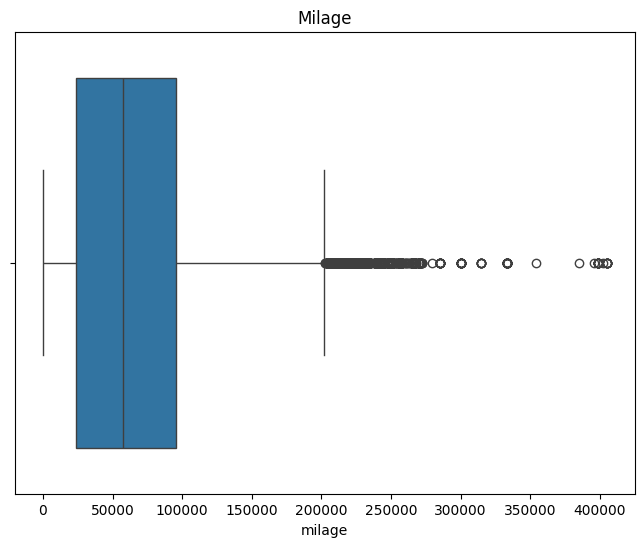

   id          brand              model  model_year  milage      fuel_type  \
1   1        Lincoln              LS V8        2002  143250       Gasoline   
2   2      Chevrolet  Silverado 2500 LT        2002  136731  E85 Flex Fuel   
3   3        Genesis   G90 5.0 Ultimate        2017   19500       Gasoline   
4   4  Mercedes-Benz        Metris Base        2021    7388       Gasoline   
5   5           Audi      A6 2.0T Sport        2018   40950       Gasoline   

                                              engine  \
1       252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel   
2  320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...   
3       420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel   
4       208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   
5       252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel   

                     transmission ext_col int_col  \
1                             A/T  Silver   Beige   
2                             A/T    Blue    Gray   
3  Transmission w/Dual Shift Mode  

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Boxplot을 이용한 시각화
plt.figure(figsize=(8, 6))
sns.boxplot(x=cp['milage'])
plt.title('Milage')
plt.show()

# IQR을 이용한 이상치 제거 기준 계산
Q1 = cp['milage'].quantile(0.25)  # 1사분위수
Q3 = cp['milage'].quantile(0.75)  # 3사분위수
IQR = Q3 - Q1  # IQR 계산
lower_bound = Q1 - 1.5 * IQR  # 하한값
upper_bound = Q3 + 1.5 * IQR  # 상한값

# 이상치를 포함한 row 제거
cp_clean = cp[(cp['milage'] >= lower_bound) & (cp['milage'] <= upper_bound)]

# 이상치가 제거된 데이터프레임 출력
print(cp_clean.head())


In [ ]:
# 원본 데이터프레임 크기
original_count = len(cp)

# IQR을 이용한 이상치 제거
cp_clean = cp[(cp['milage'] >= lower_bound) & (cp['milage'] <= upper_bound)]

# 이상치 제거 후 데이터프레임 크기
cleaned_count = len(cp_clean)

# 제거된 행의 개수 출력
removed_count = original_count - cleaned_count
print(f"제거된 이상치 행의 개수: {removed_count}개")



제거된 이상치 행의 개수: 1766개


### StandardScaler 스케일링

In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 초기화
scaler = StandardScaler()

# 'milage' 컬럼에만 StandardScaler 적용
cp_x_df['milage'] = scaler.fit_transform(cp_x_df[['milage']])

# 스케일링된 결과 확인
cp_x_df.head()

,model_year,milage,Diesel,E85 Flex Fuel,Gasoline,Hybrid,Plug-In Hybrid,Unknown,Acura,Alfa,...,Tupelo,Very Light Cashmere,WHITE,Walnut,Whisper Beige,White,White / Brown,Yellow,–,clean_title
0,2007,2.957842,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2002,1.557184,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2002,1.426276,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2017,-0.927854,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2021,-1.171076,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


### y변수 정규성 확인

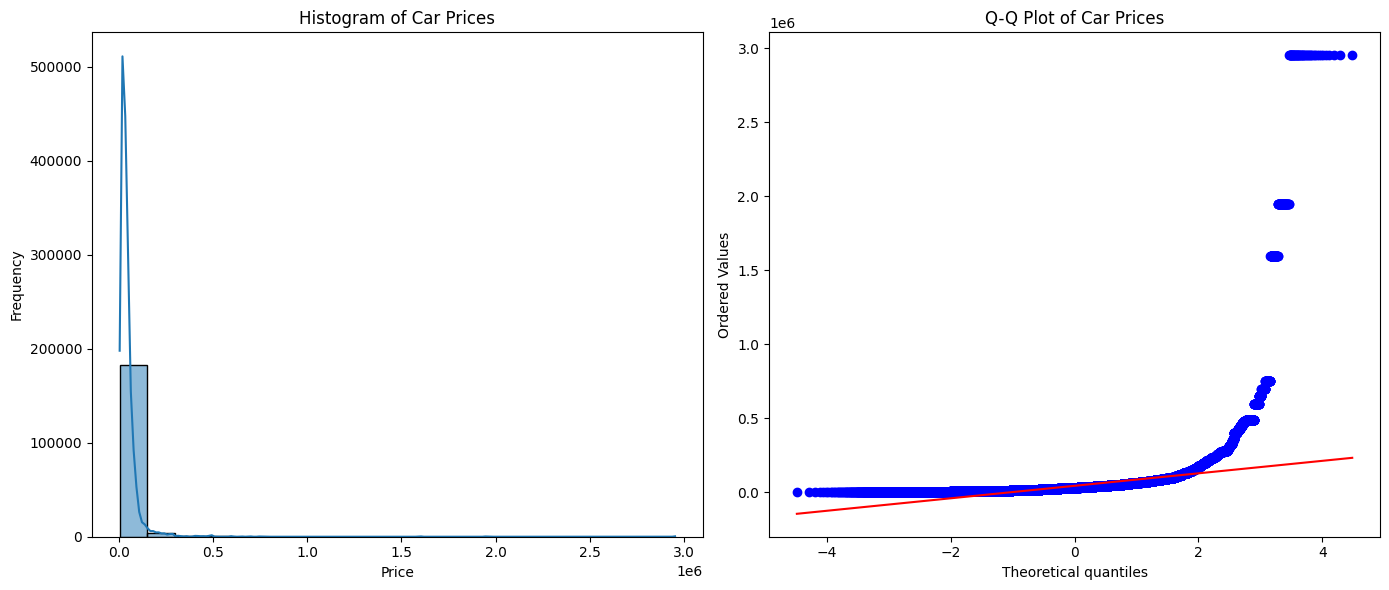

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# cp_y를 시리즈로 변환 (이 부분은 cp_y가 DataFrame이 아닌 Series일 경우)
cp_y_series = cp_y.squeeze()  # cp_y가 DataFrame이라면 Series로 변환

# 히스토그램 및 Q-Q plot 그리기
plt.figure(figsize=(14, 6))

# 원래 가격 히스토그램
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 subplot
sns.histplot(cp_y_series, bins=20, kde=True)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

# Q-Q plot
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 subplot
stats.probplot(cp_y_series, dist="norm", plot=plt)
plt.title('Q-Q Plot of Car Prices')

plt.tight_layout()
plt.show()


### y변수 로그 변환

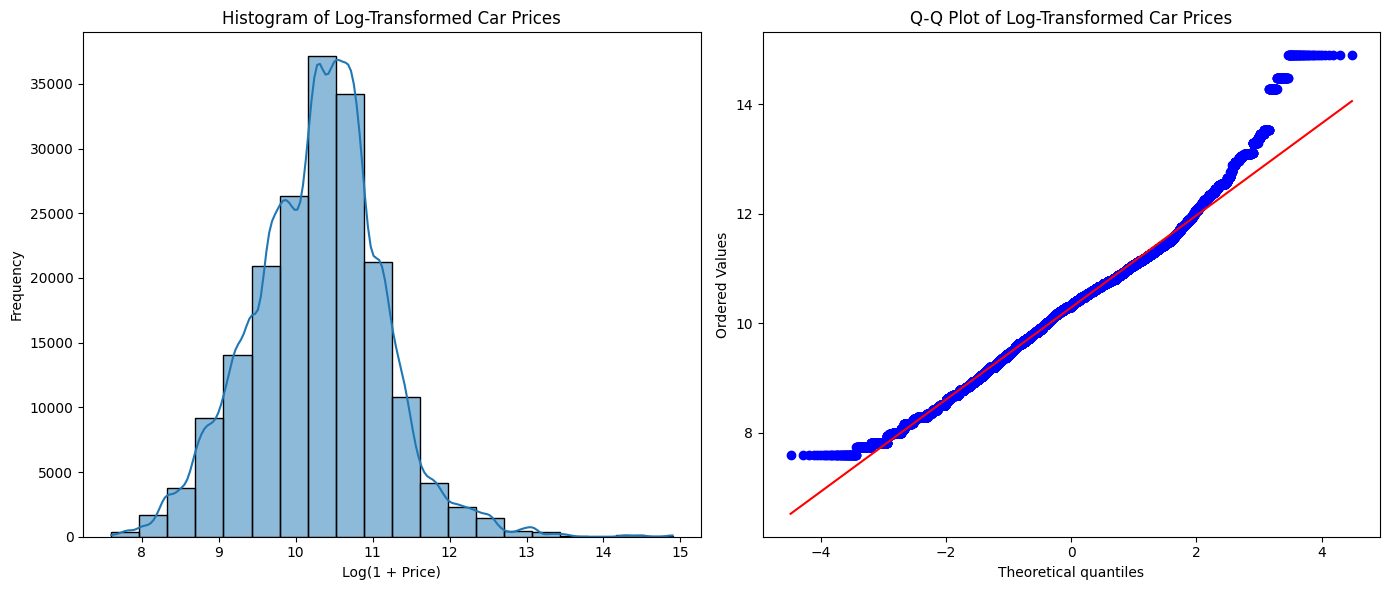

In [ ]:
# 로그 변환 (log(1 + x) 형태로 변환)
cp_y_log = np.log1p(cp_y_series)

# 로그 변환된 가격 히스토그램
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1행 2열의 첫 번째 subplot
sns.histplot(cp_y_log, bins=20, kde=True)
plt.title('Histogram of Log-Transformed Car Prices')
plt.xlabel('Log(1 + Price)')
plt.ylabel('Frequency')

# 로그 변환된 데이터 Q-Q plot
plt.subplot(1, 2, 2)  # 1행 2열의 두 번째 subplot
stats.probplot(cp_y_log, dist="norm", plot=plt)
plt.title('Q-Q Plot of Log-Transformed Car Prices')

plt.tight_layout()
plt.show()


In [1]:
print(type(cp))

NameError: name 'cp' is not defined

### VIF 계산코드

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# cp_x_df에서 특정 변수들 선택
selected_vars = [
    'Diesel', 'E85 Flex Fuel', 'Gasoline', 'Hybrid', 'Plug-In Hybrid',
    'Unknown', 'Acura', 'Alfa', 'Aston', 'Audi', 'BMW', 'Bentley',
    'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Dodge',
    'FIAT', 'Ferrari', 'Ford', 'GMC', 'Genesis', 'Honda', 'Hummer',
    'Hyundai', 'INFINITI'
]
cp_x_selected = cp_x_df[selected_vars]

# VIF 계산 함수
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# VIF 계산
vif_results = calculate_vif(cp_x_selected)
print(vif_results)


           feature       VIF
0           Diesel  1.084408
1    E85 Flex Fuel  1.112623
2         Gasoline  1.888391
3           Hybrid  1.060438
4   Plug-In Hybrid  1.007608
5          Unknown  1.008413
6            Acura  1.012753
7             Alfa  1.004098
8            Aston  1.001405
9             Audi  1.078806
10             BMW  1.084103
11         Bentley  1.006830
12         Bugatti  1.000043
13           Buick  1.005528
14        Cadillac  1.028987
15       Chevrolet  1.096671
16        Chrysler  1.007132
17           Dodge  1.017443
18            FIAT  1.000244
19         Ferrari  1.002119
20            Ford  1.158172
21             GMC  1.024065
22         Genesis  1.005715
23           Honda  1.011860
24          Hummer  1.003098
25         Hyundai  1.010976
26        INFINITI  1.018200


In [ ]:
# 전체 변수 vif 계산

# 변수가 너무 많아 계산이 되지 않는 것 같아요
#vif_results = calculate_vif(cp_x_df)
#print(vif_results)


### train-test분할

In [ ]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나누기 (여기서는 80% 훈련, 20% 테스트 비율)
X_train, X_test, y_train, y_test = train_test_split(cp_x_df, cp_y_log, test_size=0.2, random_state=42)

#나중에 로그 역변환 잊지 말 것!_!

# 결과 확인
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 150826
Test set size: 37707


**회귀 모델의 학습/예측/평가(단순선형ols,릿지,라쏘,엘라스틱)**

In [ ]:
# 모델 훈련/예측 및 성능 평가 함수

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_model_predict_and_evaluate(model, X_train, X_test, y_train, y_test, is_expm1=True):
    # 모델 훈련
    model.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측
    pred = model.predict(X_test)

    # 예측값과 실제값 복원 (로그 변환된 경우)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)

    # 성능 평가
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    r2 = r2_score(y_test, pred)
    # intercept = model.intercept_
    # coef = model.coef_

    print('###', model.__class__.__name__, '###')
    print('테스트 데이터에 대한 RMSE: {0:.3f}'.format(rmse))
    print('테스트 데이터에 대한 MAE: {0:.3f}'.format(mae))
    print('테스트 데이터에 대한 R²: {0:.3f}'.format(r2))

    # print('절편 값:', intercept)
    # print('회귀 계수값:', np.round(coef, 1))


In [ ]:
# model 별로 평가 수행

from sklearn.linear_model import Lasso, ElasticNet
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import cross_val_score

lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)
ElasticNet_reg = ElasticNet(alpha=0.01, l1_ratio=0.5)

for model in [lr_reg, ridge_reg, lasso_reg, ElasticNet_reg]:
    get_model_predict_and_evaluate(model,X_train, X_test, y_train, y_test,is_expm1=True)


### LinearRegression ###
테스트 데이터에 대한 RMSE: 69759.142
테스트 데이터에 대한 MAE: 18379.193
테스트 데이터에 대한 R²: 0.125
### Ridge ###
테스트 데이터에 대한 RMSE: 69786.134
테스트 데이터에 대한 MAE: 18367.131
테스트 데이터에 대한 R²: 0.124
### Lasso ###
테스트 데이터에 대한 RMSE: 71177.309
테스트 데이터에 대한 MAE: 19253.974
테스트 데이터에 대한 R²: 0.089
### ElasticNet ###
테스트 데이터에 대한 RMSE: 71071.328
테스트 데이터에 대한 MAE: 19169.348
테스트 데이터에 대한 R²: 0.092


**회귀 모델의 회귀 계수 시각화**

In [ ]:
def get_top_bottom_coef(model):
    # coef_ 속성을 기반으로 Series 객체를 생성. index는 컬럼명.
    coef = pd.Series(model.coef_, index=cp_x_df.columns)
    print(coef.sort_values(ascending=False)[:20])

    # + 상위 10개 , - 하위 10개 coefficient 추출하여 반환.
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


Model: LinearRegression
Diesel                        1.521509e+10
Unknown                       1.521509e+10
E85 Flex Fuel                 1.521509e+10
Hybrid                        1.521509e+10
Gasoline                      1.521509e+10
Plug-In Hybrid                1.521509e+10
Blue Caelum                   1.373634e+09
Tempest                       1.373634e+09
Ice                           1.373634e+09
Lizard Green                  1.373634e+09
Diamond White                 1.373634e+09
C / C                         1.373634e+09
Donington Grey Metallic       1.373634e+09
Bianco Monocerus              1.373634e+09
China Blue                    1.373634e+09
GT SILVER                     1.373634e+09
Brands Hatch Gray Metallic    1.373634e+09
Carpathian Grey               1.373634e+09
Apex Blue                     1.373634e+09
Sandstone Metallic            1.373634e+09
dtype: float64
Diesel                        1.521509e+10
Unknown                       1.521509e+10
E85 Flex Fuel  

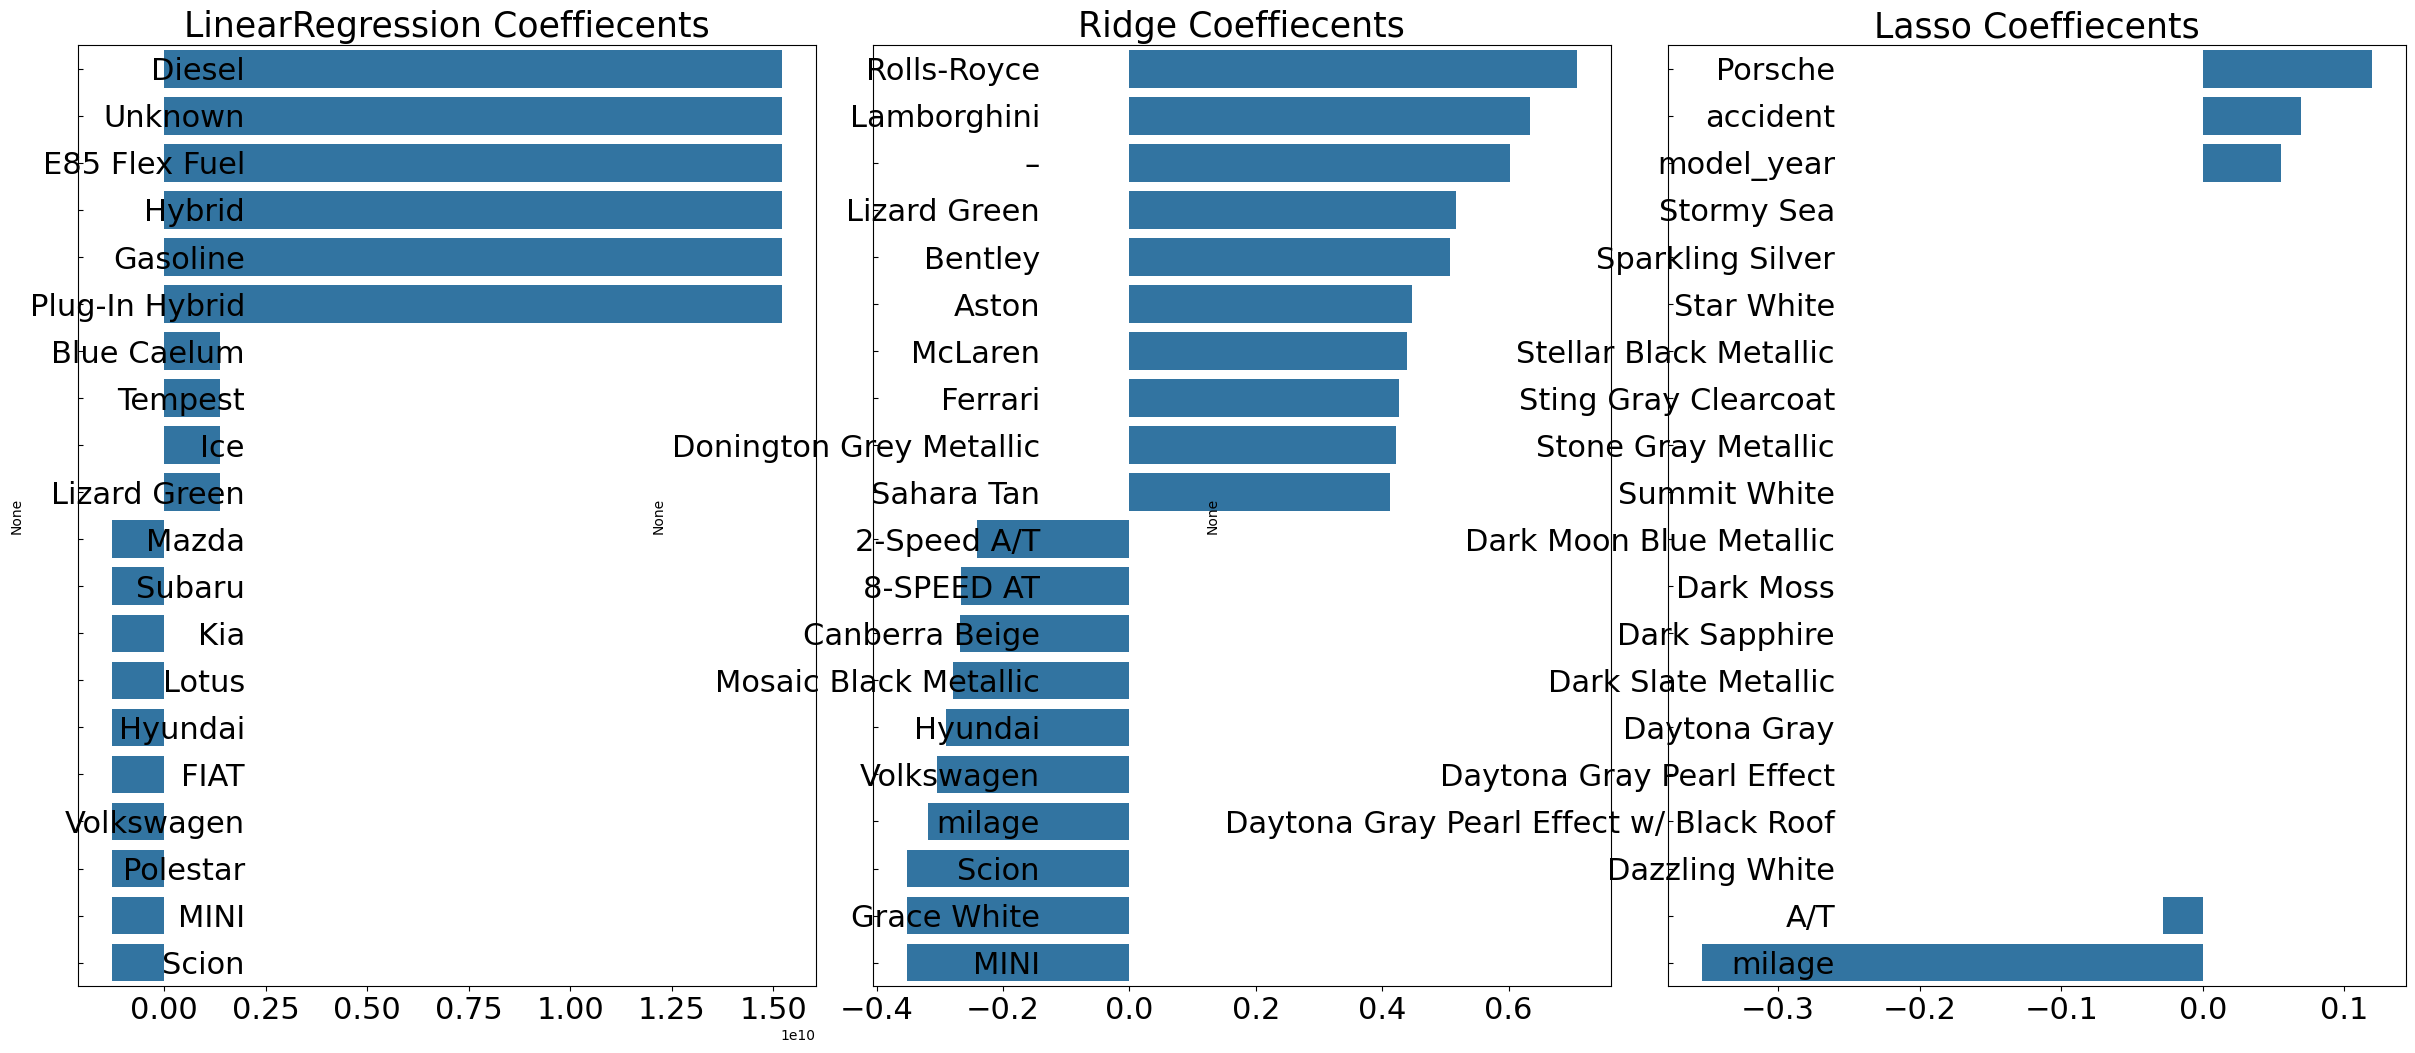

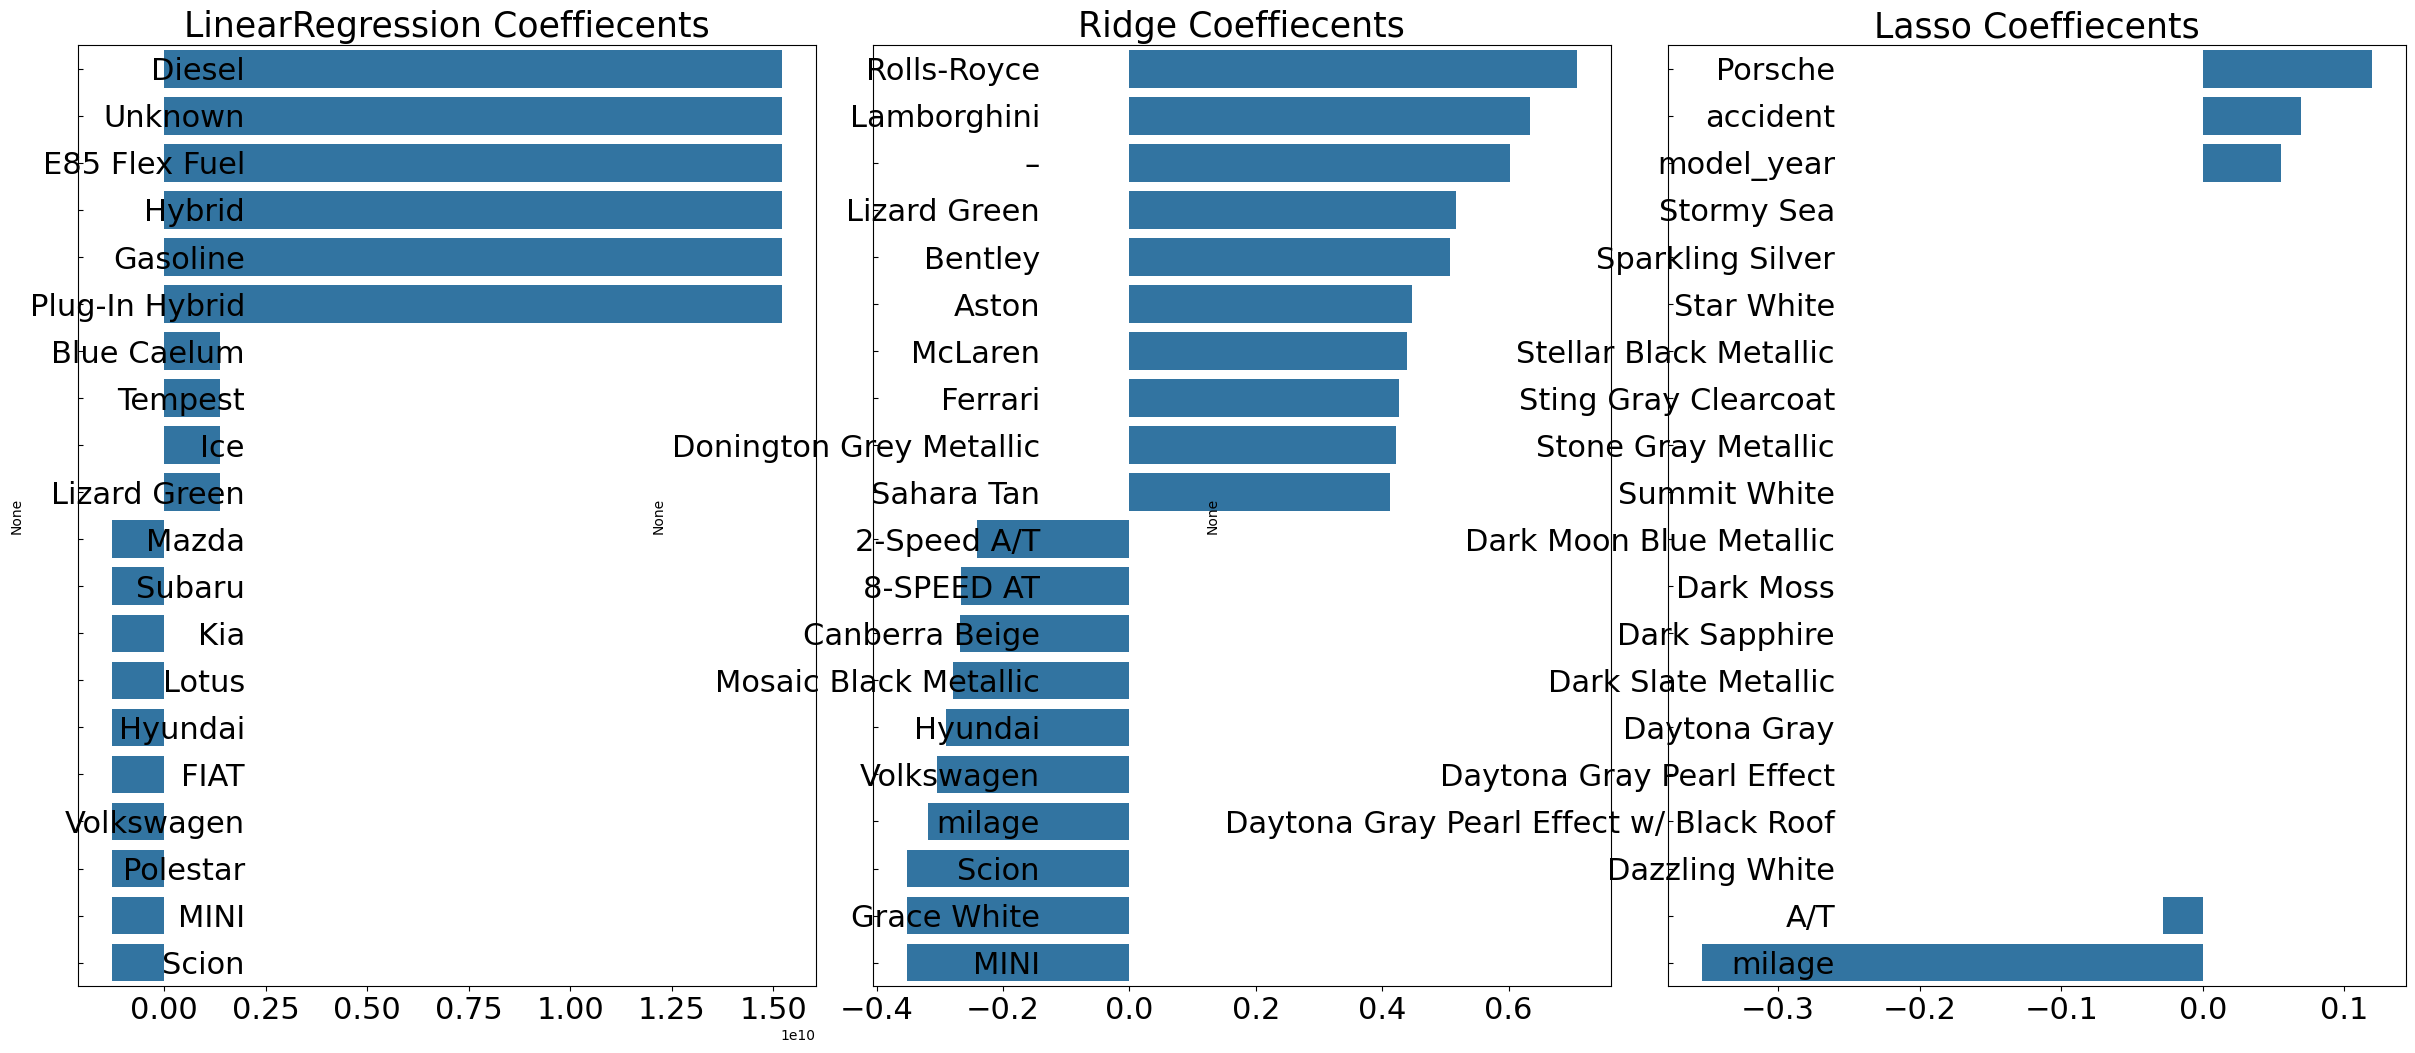

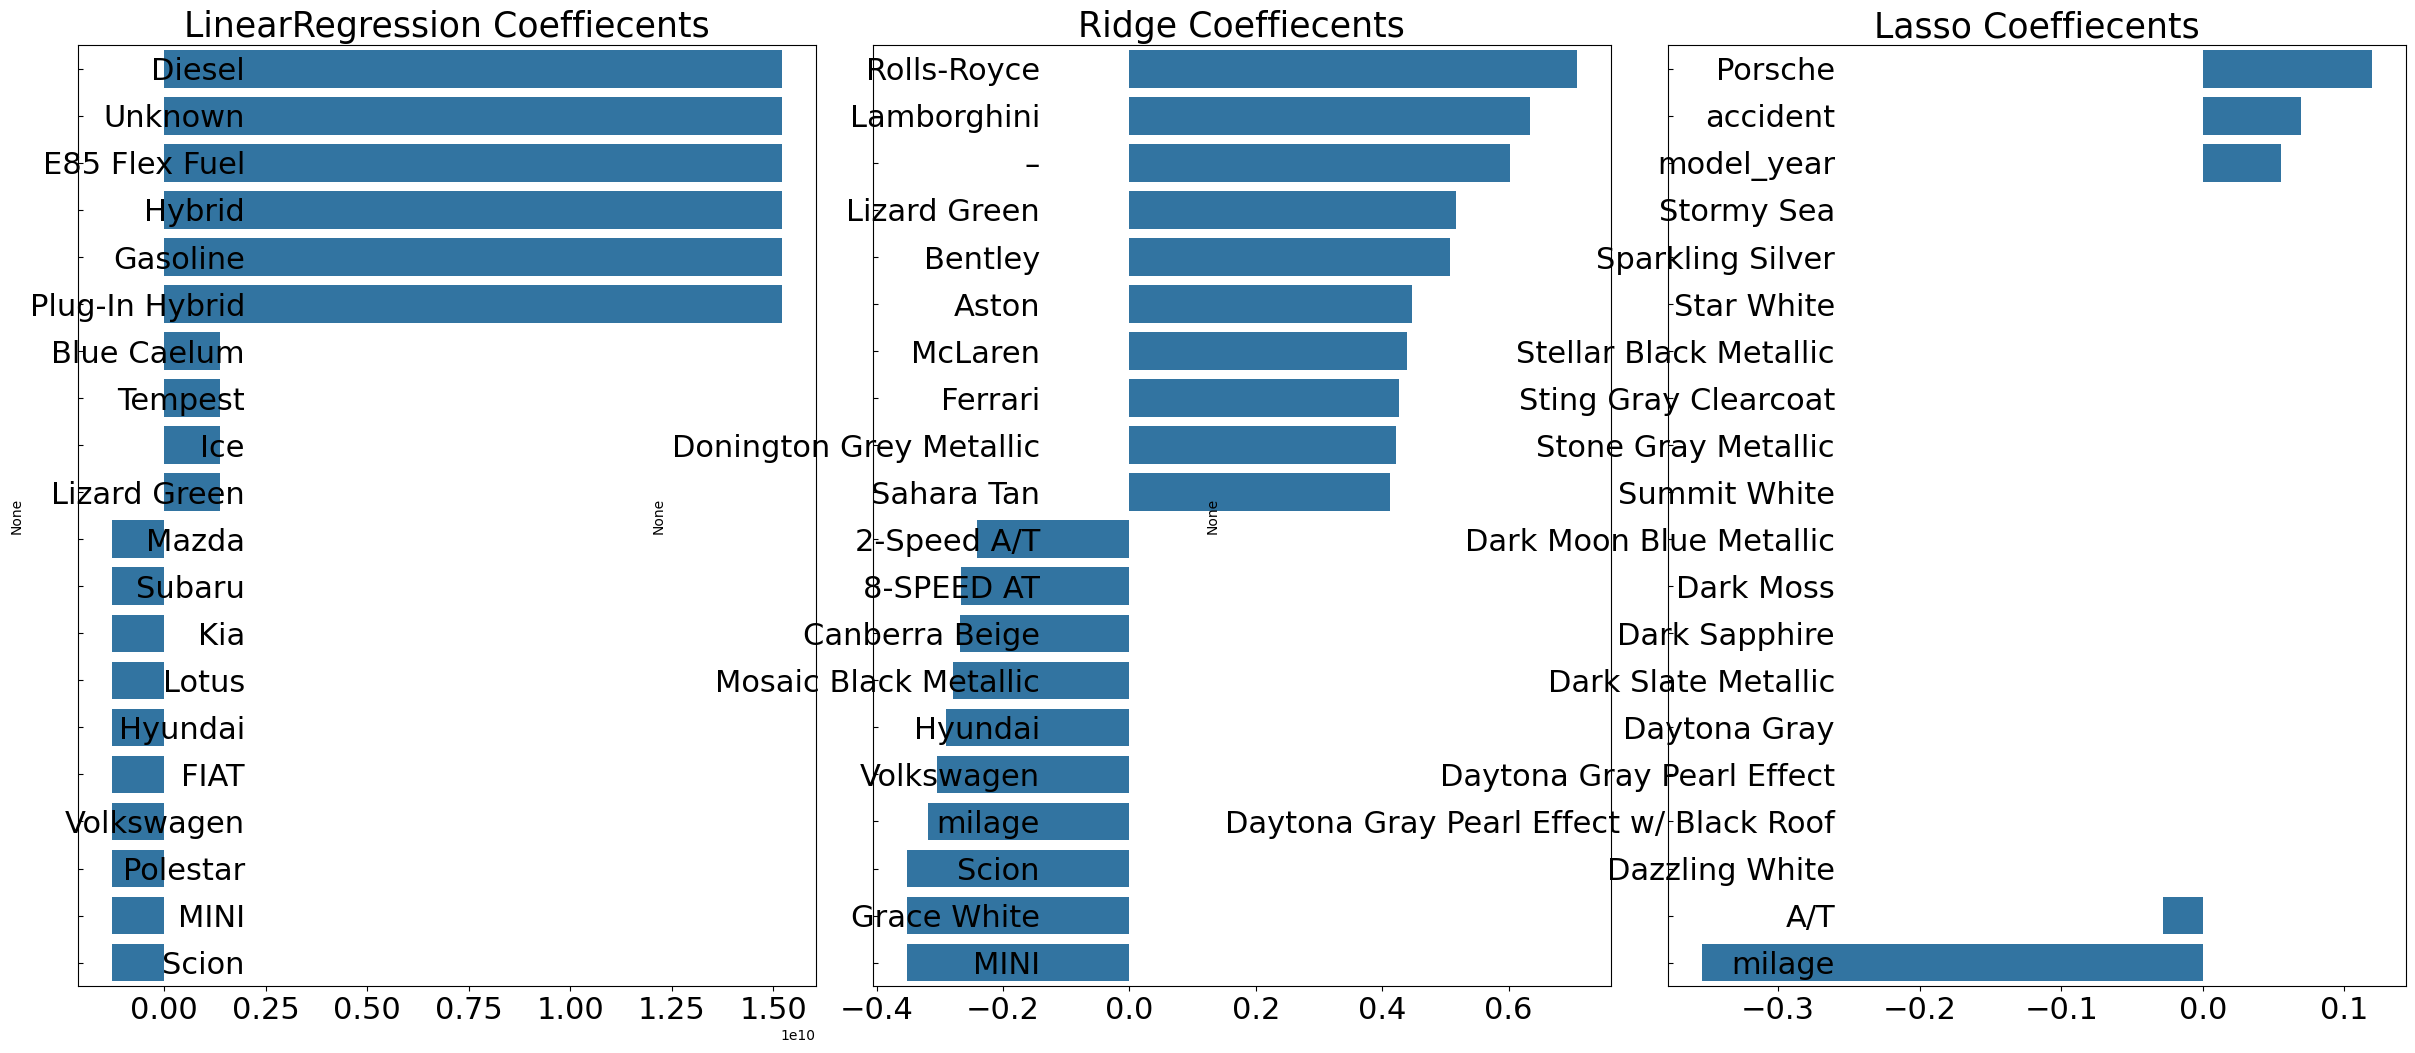

In [ ]:
def visualize_coefficient(models):
    # 3개 회귀 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout()
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 회귀 계수 시각화.
    for i_num, model in enumerate(models):
        # 상위 10개, 하위 10개 회귀 계수를 구하고, 이를 판다스 concat으로 결합.
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        # 순차적으로 ax subplot에 barchar로 표현. 한 화면에 표현하기 위해 tick label 위치와 font 크기 조정.
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

# 앞 예제에서 학습한 lr_reg, ridge_reg, lasso_reg 모델의 회귀 계수 시각화.
models = [lr_reg, ridge_reg, lasso_reg]
for model in models:
    print(f"Model: {model.__class__.__name__}")
    get_top_bottom_coef(model)
    visualize_coefficient(models)


**회귀트리 훈련/예측**

In [ ]:
# 모델 훈련/예측 및 성능 평가 함수

import numpy as np
from sklearn.model_selection import cross_val_score

def get_model_predict_and_evaluate(model, X_train, X_test, y_train, y_test, is_expm1=True):
    # 모델 훈련
    model.fit(X_train, y_train)

    # 테스트 데이터에 대한 예측
    pred = model.predict(X_test)

    # 예측값과 실제값 복원 (로그 변환된 경우)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)

    # RMSE 계산
    rmse_scores = [np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(pred))) for pred in y_pred_list]
    avg_rmse = np.mean(rmse_scores)

    print('##### ', model.__class__.__name__, ' #####')
    print('5 교차 검증의 평균 RMSE : {0:.3f} '.format(avg_rmse))


In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

# 랜덤 포레스트, GBM, XGBoost, LightGBM model 별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 DataFrame이 입력 될 경우 버전에 따라 오류 발생 가능. ndarray로 변환.
    get_model_predict_and_evaluate(model,X_train.values, X_test.values, y_train.values, y_test.values,is_expm1=True)

------------------------------------------------------------------------------------------------------

In [ ]:
# 릿지

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

In [ ]:
# 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]

# alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

    # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

# 이후 해야할 것
- vif 및 상관계수 활용한 변수 선택(전진선택, 후진소거, 단계별선택)->다중공선성해소
- 회귀 모델 적합(단순선형ols,릿지,라쏘,엘라스틱)
- 교차검증 corss_val->하이퍼파라미터튜닝 gridsearch
